# House Price Analysis

## Table of Contents


* [Import Libraries](#import)
* [Data Cleaning](#cleaning)
    - [Train](#train)
    - [Test](#test)
* [Feature Engineering](#feature)
* [Analysis](#analysis)
    - [Visualizations](#visual)
    - [Models](#models)
        - [Random Forest](#random)
        - [Gradient](#gradient)
        - [Logistic](#logistic)
        - [Decision Tree](#decision)
    - [Final Accuracies](#final)
* [Submisson](#submission)  

<a id = 'import'></a>
# Import

In [181]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor


labelencoder = LabelEncoder()
%matplotlib inline

from sklearn.datasets import load_boston
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv
/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt


In [182]:
def dummyEncode(df):
    columnsToEncode = list(df.select_dtypes(include=['category','object']))
    le = LabelEncoder()
    for feature in columnsToEncode:
        try:
            df[feature] = le.fit_transform(df[feature])
            print(df[feature])
        except:
            print('Error encoding '+feature)
    return df

In [183]:
train_data = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [184]:
test_data = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


<a id = 'cleaning'></a>
# Data Cleaning

<a id = "train"></a>
## Train Data

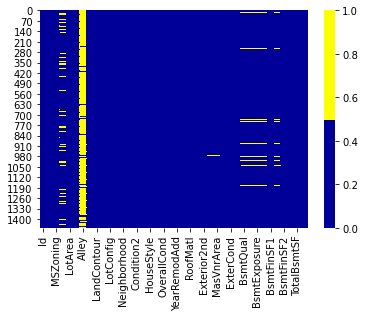

In [185]:
cols = train_data.columns[:40] # first 30 columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(train_data[cols].isnull(), cmap=sns.color_palette(colours))

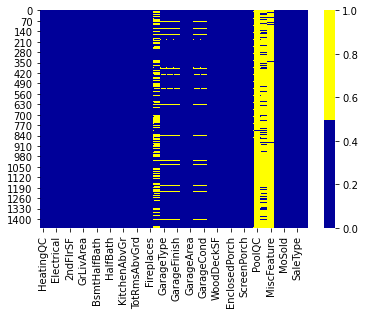

In [186]:
cols = train_data.columns[40:80] # first 30 columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(train_data[cols].isnull(), cmap=sns.color_palette(colours))

In [187]:
data = [train_data['SalePrice'], train_data['LotArea'], train_data['LotFrontage'],train_data['SaleType'],train_data['Condition2']]
headers = ["SalePrice","LotArea","LotFrontage","SaleType","Condition"]
train = pd.concat(data, axis=1, keys=headers)
train.head()

,SalePrice,LotArea,LotFrontage,SaleType,Condition
0,208500,8450,65.0,WD,Norm
1,181500,9600,80.0,WD,Norm
2,223500,11250,68.0,WD,Norm
3,140000,9550,60.0,WD,Norm
4,250000,14260,84.0,WD,Norm


In [188]:
train = dummyEncode(train)
train.head()

0       8
1       8
2       8
3       8
4       8
       ..
1455    8
1456    8
1457    8
1458    8
1459    8
Name: SaleType, Length: 1460, dtype: int64
0       2
1       2
2       2
3       2
4       2
       ..
1455    2
1456    2
1457    2
1458    2
1459    2
Name: Condition, Length: 1460, dtype: int64


,SalePrice,LotArea,LotFrontage,SaleType,Condition
0,208500,8450,65.0,8,2
1,181500,9600,80.0,8,2
2,223500,11250,68.0,8,2
3,140000,9550,60.0,8,2
4,250000,14260,84.0,8,2


<a id = "test"></a>
## Test Data

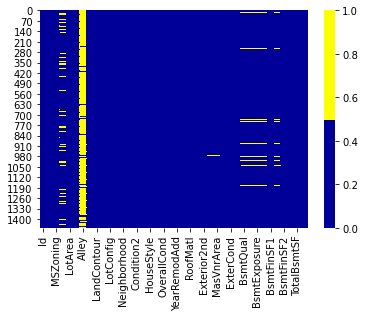

In [189]:
cols = test_data.columns[0:40] # first 30 columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(test_data[cols].isnull(), cmap=sns.color_palette(colours))

In [190]:
data = [test_data['SalePrice'], test_data['LotArea'], test_data['LotFrontage'],test_data['SaleType'],test_data['Condition2']]
headers = ["SalePrice","LotArea","LotFrontage","SaleType","Condition"]
test = pd.concat(data, axis=1, keys=headers)
test.head()

,SalePrice,LotArea,LotFrontage,SaleType,Condition
0,208500,8450,65.0,WD,Norm
1,181500,9600,80.0,WD,Norm
2,223500,11250,68.0,WD,Norm
3,140000,9550,60.0,WD,Norm
4,250000,14260,84.0,WD,Norm


In [191]:
test = dummyEncode(train)
test.head()

#Sale Type
    #0 COD
    #1
    #2
    #3
    #4
    #5
    #6 New
    #7 
    #8 WD
#Condition
    #0 Artery
    #1
    #2 Norm
    #3
    #4
    #5
    #6
    #7 RRNn 

,SalePrice,LotArea,LotFrontage,SaleType,Condition
0,208500,8450,65.0,8,2
1,181500,9600,80.0,8,2
2,223500,11250,68.0,8,2
3,140000,9550,60.0,8,2
4,250000,14260,84.0,8,2


<a id = 'feature'></a>
# Feature Engineering

In [192]:
train['PrecFrontage'] = train['LotFrontage']/train['LotArea'] * 100

test['PrecFrontage'] = test['LotFrontage'] / test['LotArea'] * 100

train.head()

,SalePrice,LotArea,LotFrontage,SaleType,Condition,PrecFrontage
0,208500,8450,65.0,8,2,0.769231
1,181500,9600,80.0,8,2,0.833333
2,223500,11250,68.0,8,2,0.604444
3,140000,9550,60.0,8,2,0.628272
4,250000,14260,84.0,8,2,0.589060


<a id = "analysis"></a>
# Analysis

<a id = "visual"></a>
## Visualizations

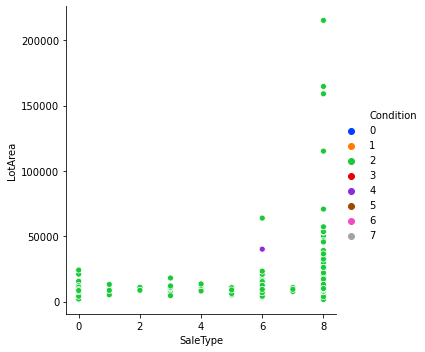

In [193]:
palette = sns.color_palette("bright", 8)
sns.relplot(x="SaleType", y="LotArea", hue="Condition", data=train, legend = 'full', palette=palette)



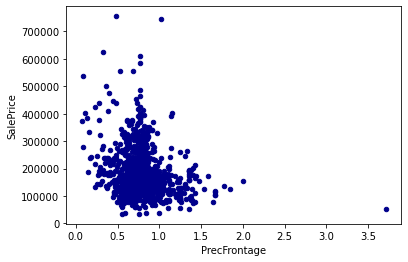

In [194]:
ax1 = train.plot.scatter(x='LotArea',
                      y='SalePrice',
                      c='DarkBlue')